<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/Reduccion_dimensiones_A01793812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Repaso Transformación y reducción de dimensiones**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y Analítica de DAtos**
###**Tecnológico de Monterrey**
###**Prof María de la Paz Rico Fernández**

###**Nombre del estudiante: Alejandro García Hernández**

###**Matrícula: A01793812**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
#Librerias a usar
import numpy as np
from numpy import array
from numpy.linalg import eig

# se definen las matrices
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

print("-------Matrices originales-------")
print("Matriz A")
print(A)
print("Matriz A2")
print(A2)
print("Matriz A3")
print(A3)
print("-----------------------------")

-------Matrices originales-------
Matriz A
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
Matriz A2
[[1 3 8]
 [2 0 0]
 [0 0 1]]
Matriz A3
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


In [3]:
#se obtienen los eigenvalores y eigenvectores de las matrices
lista = [A,A2,A3]
nombres = ["A","A2","A3"]

x=0
for i in lista:
  values, W = eig(i)
  print("Los eigenvalores de la matriz ",nombres[x],"son: \n",values) 
  print("El eigenvectores de la matriz ",nombres[x],"es: \n",W) 
  x=x+1

Los eigenvalores de la matriz  A son: 
 [3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
El eigenvectores de la matriz  A es: 
 [[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
Los eigenvalores de la matriz  A2 son: 
 [ 3. -2.  1.]
El eigenvectores de la matriz  A2 es: 
 [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
Los eigenvalores de la matriz  A3 son: 
 [ 6.89167094 -0.214175   -0.67749594]
El eigenvectores de la matriz  A3 es: 
 [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]


In [4]:
#Se reconstruyen las matrices originales 
x=0
for i in lista:
  values, W = np.linalg.eig(i)
  Winv = np.linalg.inv(W)
  D = np.diag(values)
  B1 = np.dot(W,D)
  B = np.rint(np.dot(B1,Winv))
  print("la matriz ",nombres[x]," reconstruida es: \n",B)
  x=x+1

la matriz  A  reconstruida es: 
 [[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
la matriz  A2  reconstruida es: 
 [[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
la matriz  A3  reconstruida es: 
 [[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


In [5]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B1 = np.dot(W,D)
B = np.dot(B1,Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


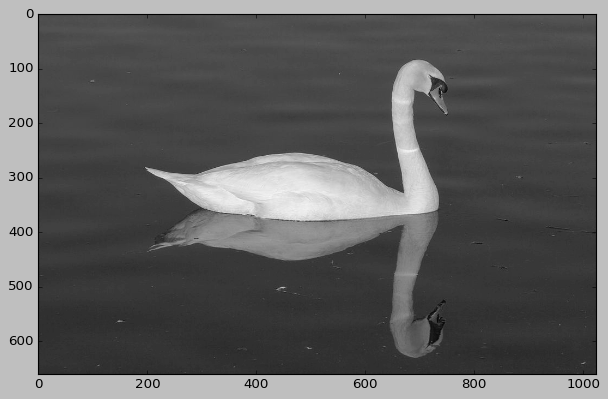

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F097E4ADA90>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

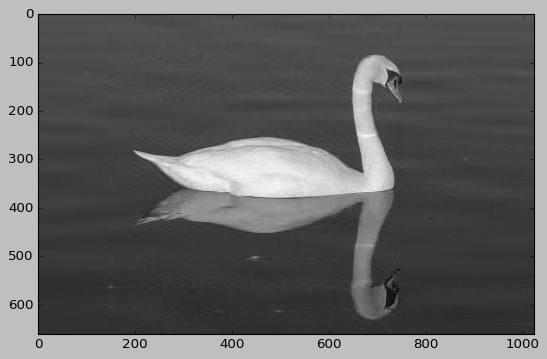

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

#Imagen 1

[252. 253. 213. ...   4.   3.   5.]


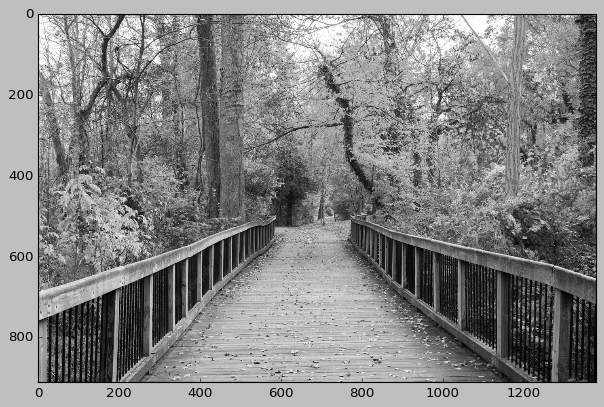

<PIL.Image.Image image mode=LA size=1380x910 at 0x7F097A045E10>


In [11]:
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://img.freepik.com/foto-gratis/hermoso-camino-madera-que-impresionantes-arboles-coloridos-bosque_181624-5840.jpg?w=1380&t=st=1666655459~exp=1666656059~hmac=cb2920ae09daf0e408f434fd50c436b25e7f988cc363938a177728e17d344dcc')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [12]:
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

(910, 1380)
(910, 910)
(1380, 1380)


Imagen utilizando el valor de  50


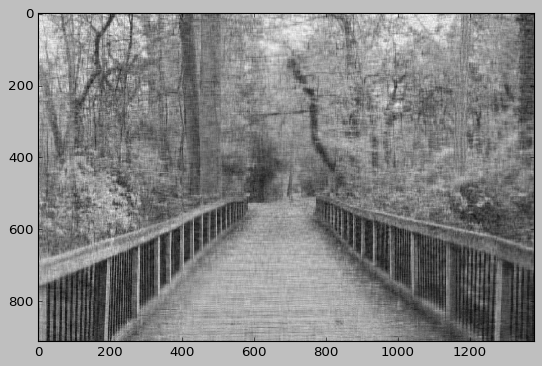

Imagen utilizando el valor de  100


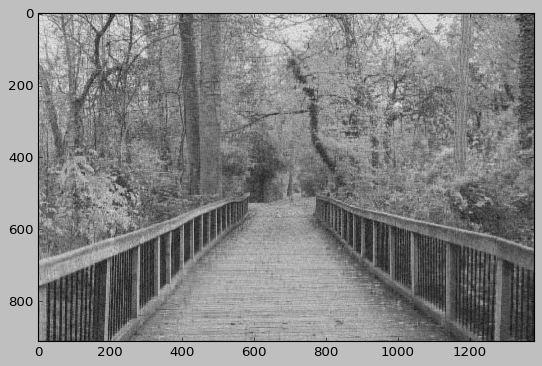

Imagen utilizando el valor de  200


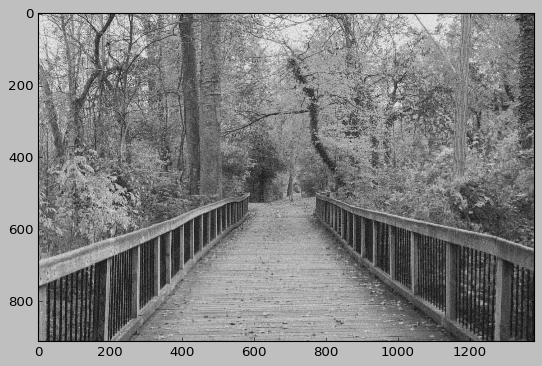

Imagen utilizando el valor de  300


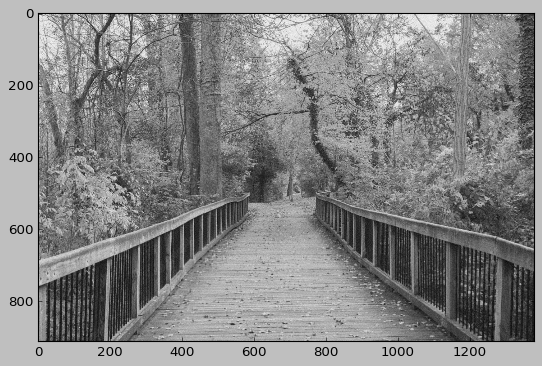

Imagen utilizando el valor de  400


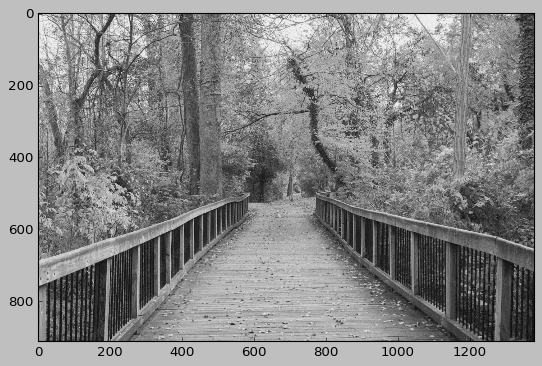

Imagen utilizando el valor de  500


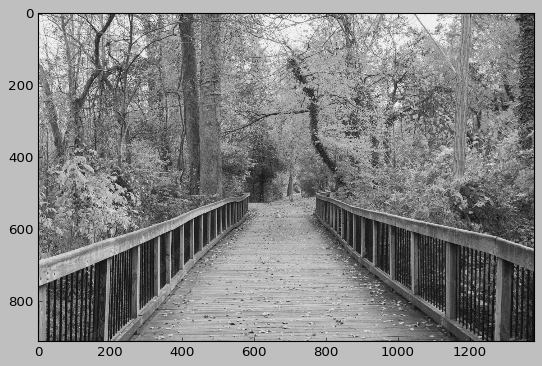

In [13]:
#Generamos las imágenes con algunos numeros entre el rango 0-910"
for i in [50,100,200,300,400,500]:
  nvalue = i

  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen utilizando el valor de ",i)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
 #Se observa que a partir del valor de 100 la imagen se ve muy similar a la original 


#Imagen 2

[11. 22. 10. ...  6.  7.  7.]


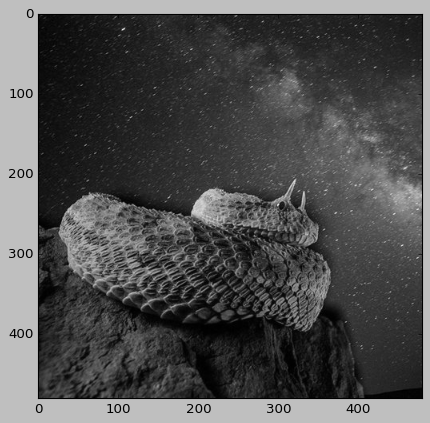

<PIL.Image.Image image mode=LA size=480x480 at 0x7F097BDCF410>


In [14]:
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.nationalgeographic.com.es/medio/2022/10/09/javier-aznar-b3-cuernos-galacticos_d46dc9c9_480x480.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [15]:
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

(480, 480)
(480, 480)
(480, 480)


Imagen utilizando el valor de  50


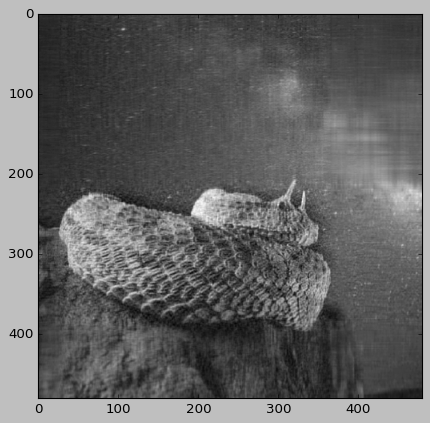

Imagen utilizando el valor de  100


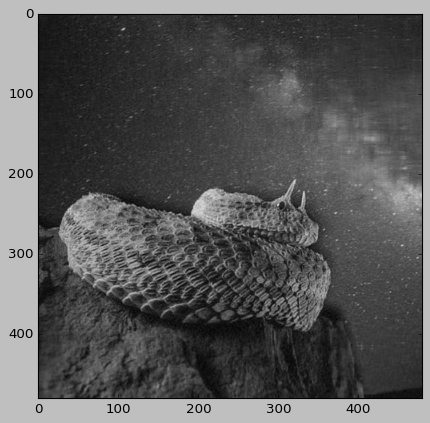

Imagen utilizando el valor de  150


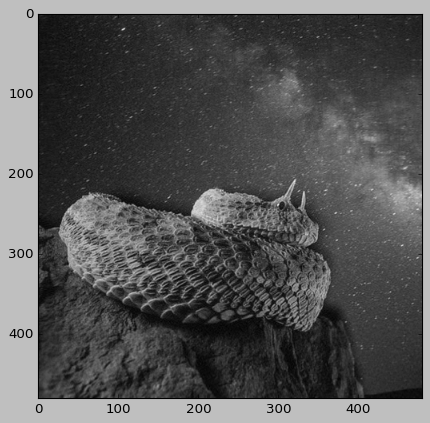

Imagen utilizando el valor de  200


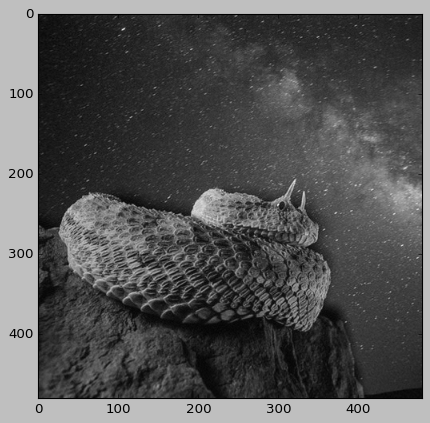

Imagen utilizando el valor de  250


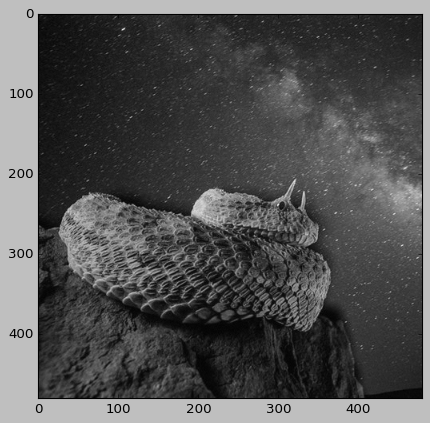

Imagen utilizando el valor de  300


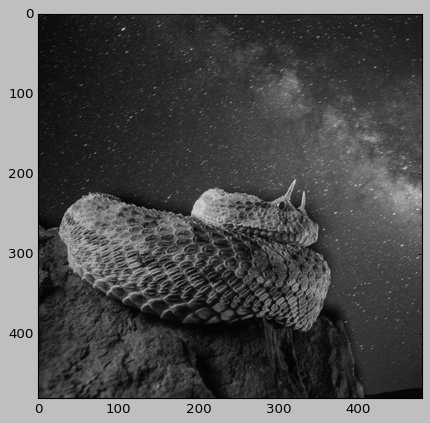

In [16]:
#Generamos las imágenes con algunos numeros entre el rango 0-480
for i in [50,100,150,200,250,300]:
  nvalue = i

  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen utilizando el valor de ",i)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
 #Se observa que a partir del valor de 150 la imagen se ve muy similar a la original (con 100 la serpiente se ve bien pero el fondo aún se ve distorcionado)

# Imagen 3

[112. 112. 112. ... 111. 112. 113.]


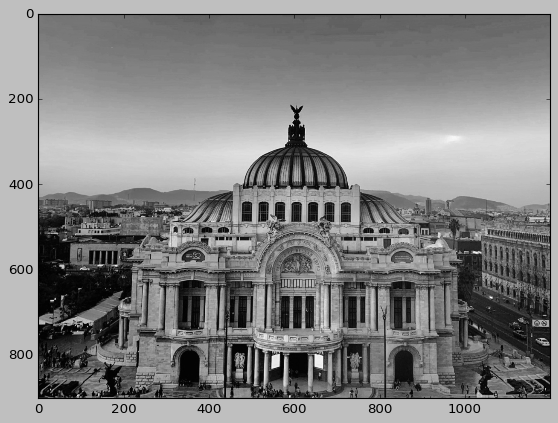

<PIL.Image.Image image mode=LA size=1200x900 at 0x7F0979CB8650>


In [17]:
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://topadventure.com/__export/1634488807497/sites/laverdad/img/2021/10/17/lo_que_no_sabxas_del_centro_histxrico_de_la_cdmx_1.jpg_1306551961.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [18]:
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

(900, 1200)
(900, 900)
(1200, 1200)


Imagen utilizando el valor de  50


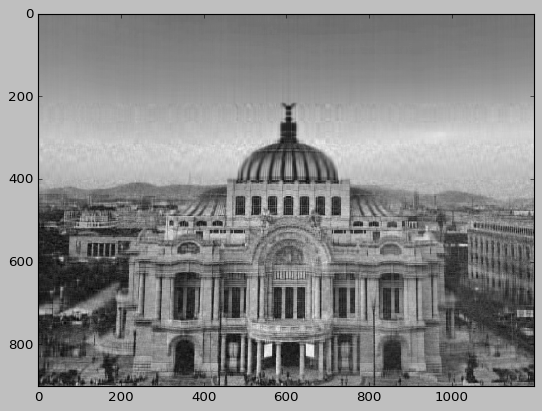

Imagen utilizando el valor de  100


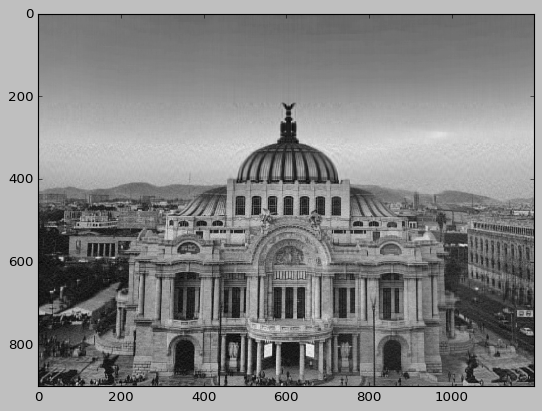

Imagen utilizando el valor de  200


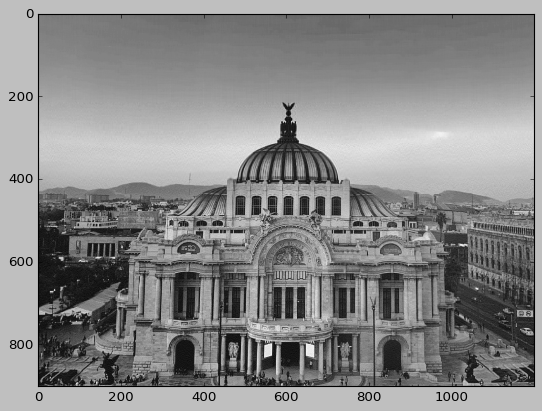

Imagen utilizando el valor de  300


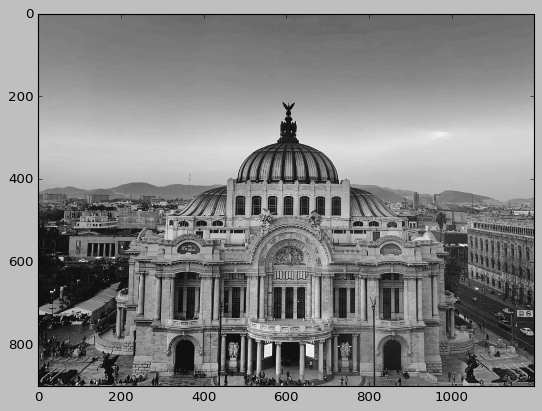

Imagen utilizando el valor de  400


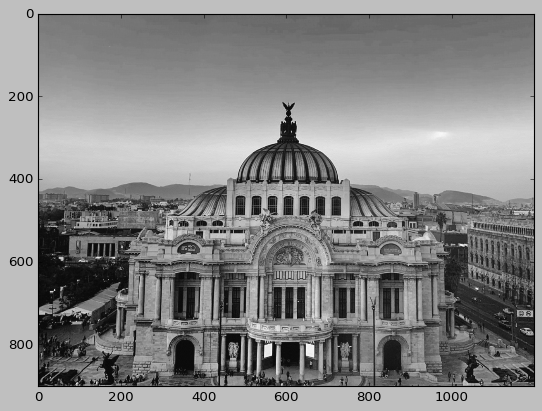

Imagen utilizando el valor de  500


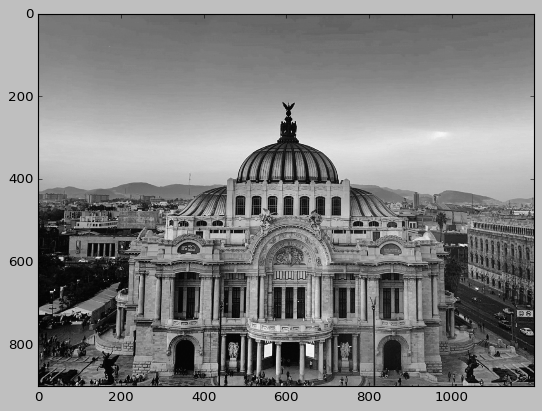

In [19]:
#Generamos las imágenes con algunos numeros entre el rango 0-900
for i in [50,100,200,300,400,500]:
  nvalue = i

  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

  print("Imagen utilizando el valor de ",i)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
 #Se observa que a partir del valor de 200 la imagen se ve muy similar a la original (con 100 se ve bien pero el fondo aún se ve distorcionado)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [20]:
# se cargan las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


plt.style.use('ggplot')
# se cargan los datos y se genera el conjunto con las variables dependiente e independientes
iris = datasets.load_iris()
X = iris.data
y = iris.target
# se estandarizan los datos 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# se obtienen solo 2 componentes principales
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

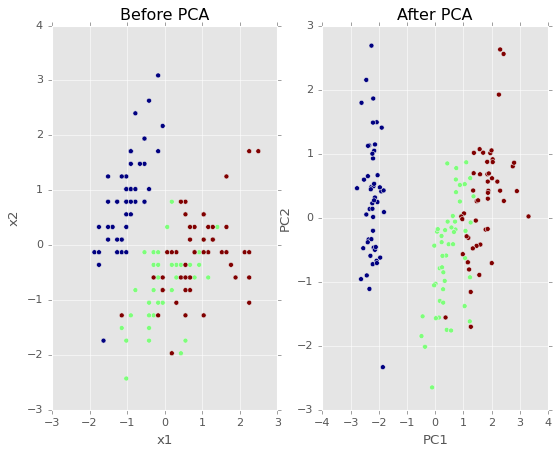

[0.72962445 0.22850762]


In [27]:
#Se grafican las primeras dos variables vs los dos componentes principales obtenidos 
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()
print(pca.explained_variance_ratio_)
# se observa que el primer componente captura alrededor del 73% de la varianza original de los datos, mientras que el segundo componente aproximandamente el 23%
#es decir, entre ambos capturan aproximadamente el 96% de la variación.

In [ ]:
print(abs( pca.components_ ))
#Para el primer componente las variables más relevantes son la 1, 3 y 4.
#Para el segundo componente la variable 2 y en menor medida la variable 1.

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

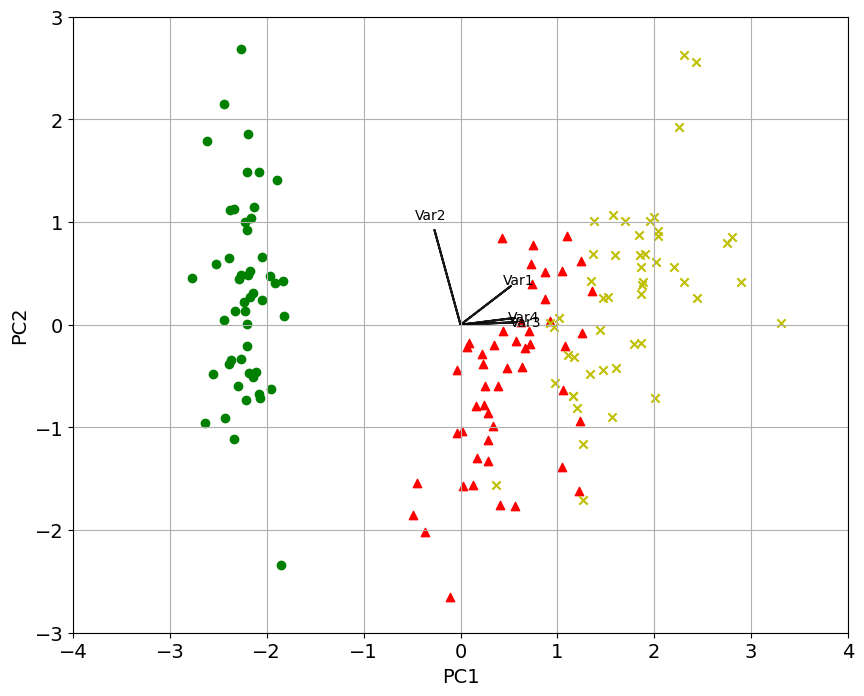

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


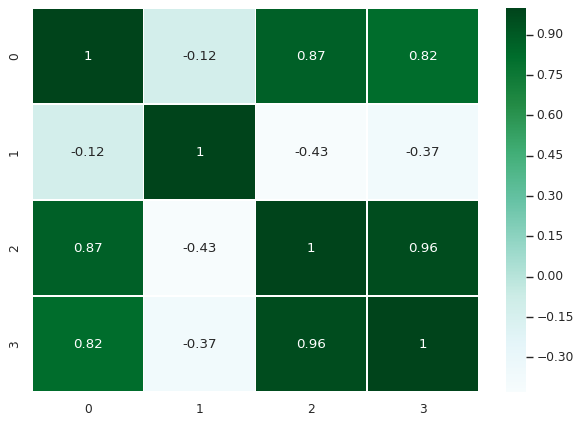

In [30]:
import seaborn as sns

X_df=pd.DataFrame(X)

sns.set(rc={'figure.figsize':(9,6)}) 

sns.heatmap(round(X_df.corr(),3), annot = True, cmap= 'BuGn', linewidths= 0.5)

plt.show()

#Aquí se observa que existe una fuerte correlación positiva entre varias variables.
#Entre la 1 y la 3 de 87%
#Entre la 1 y la 4 de 82%
#Entre la 3 y la 4 de 96%
#Y también existe una correlación negativa entre algunas:
#Entre la 2 y la 3 de 43%
#Entre la 2 y la 4 de 37%

#Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

## Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

En el ejercicio básicamente se muestra los pasos para realizar el análisis de componentes principales, 
- Obtener los datos
- En este caso no se le hizo ningún tipo de limpieza a los datos pero sería conveniente revisar la calidad de los mismos y realizar las depuraciones correspondientes.
- Estandarizar las variables. Este paso es fundamental ya que este análisis se basa en las varianzas de las variables y en caso de que no todas las variables estén en las mismas unidades, las variables con mayor varianza dominarían al resto.
- En este caso se obtuvieron solo 2 componentes principales pero pudieron haber sido hasta 4, sin embargo el objetivo de este análisis es reducir la dimensión de nuestros datos.
- Finalmente se muestra la relevancia de cada una de las variables sobre los dos componentes principales.
- Las variables 1, 3 y 4 son las mas relevantes para el primer componente principal, que las 3 esten en un mismo componente era de esperarse si observamos primero el heatmap de correlaciones en donde se observa que estas variables tienen una fuerte correlación positiva entre ellas.


## ¿Qué es feature importance y para que nos sirve?

Feature importance se refiere a la importancia que tiene cada una de las variables de entrada sobre cada una de las componentes principales medido mediante un score. Esto es relevante ya que al reducir la dimensionalidad de la base, será más fácil explicar las componentes en función de que variables son las mas relevantes, por ejemplo, si queremos predecir el precio de un auto, pero al realizar PCA tenemos que la primer componente las variables más relevantes son el tamaño del motor, caballos de fuerza, sistema de frenado, ect podríamos decir que la primer componente se refiere a las características mecanicas del auto, y si la segunda componente tiene como variables relevantes el color, los rines, tipo de tela, etc, podríamos decir que la segunda componente se refiere a las características estéticas del vehículo.



## ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
Dada la fuerte correlación positiva entre 3 de las 4 variables de entrada, fue posible reducir la dimensión de la base de 4 a dos variables, de hecho solo con el primer componente principal ya se explica casi 3/4 partes de la variación original de los datos. 


## ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
Este análisis es relevante cuando sabemos o es obvio que hay variables que estar correlacionadas entre si; otro caso sería cuando, aunque no sepamos o sea obvia la correlación entre variables, el número de variables con las que contamos es alto.

